### Decsion Trees
A file to explore applicaitons of Decision Tree Classifiers for predicting the winner of a fight

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
path = os.getcwd()
p = path.removesuffix('ufcPredictionProject')
p= p+'UFCdata.csv'
p

'C:\\Users\\walkowae\\Desktop\\GitProjects\\UFCdata.csv'

In [3]:
df = pd.read_csv(p)


df.head(3)


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0


In [4]:
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
print(cols_to_drop)
df = df.drop(cols_to_drop, axis=1)
df.head()

Index(['B_draw', 'R_draw'], dtype='object')


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Aalon Cruz,Spike Carlyle,Scott Howard,2/29/2020,"Norfolk, Virginia, USA",Blue,False,Featherweight,NaN,NaN,...,0,0,0,0,Switch,182.88,198.12,145.0,26.0,30.0
1,Aaron Phillips,Matt Hobar,Kevin Nix,8/23/2014,"Tulsa, Oklahoma, USA",Blue,False,Bantamweight,0.0,0.0,...,0,0,0,0,Southpaw,175.26,180.34,135.0,27.0,25.0
2,Aaron Riley,Justin Salas,Randy Corley,7/27/2013,"Seattle, Washington, USA",Blue,False,Lightweight,0.0,1.0,...,3,0,0,0,Southpaw,172.72,175.26,155.0,31.0,32.0
3,Aaron Riley,Joe Brammer,Steve Mazzagatti,5/29/2010,"Las Vegas, Nevada, USA",Red,False,Lightweight,0.0,0.0,...,2,0,0,0,Southpaw,172.72,175.26,155.0,26.0,29.0
4,Aaron Riley,Shane Nelson,Kevin Mulhall,8/8/2009,"Philadelphia, Pennsylvania, USA",Red,False,Lightweight,0.5,0.0,...,1,0,0,0,Southpaw,172.72,175.26,155.0,24.0,28.0


In [5]:
print(df.shape)
df = df.dropna()
df.shape

(6012, 142)


(3890, 142)

In [6]:
y = df.Winner
df = df.drop('Winner', axis = 1)
X_category = df.select_dtypes(exclude=np.number)
X_numerical = df.select_dtypes(include=np.number)
X_numerical = (X_numerical - X_numerical.mean())/X_numerical.std() 
print(X_category.columns)
X_numerical.head(3)

Index(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'title_bout',
       'weight_class', 'B_Stance', 'R_Stance'],
      dtype='object')


,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
1,-0.690263,-0.560499,-1.704518,1.003821,-1.119503,2.970785,-0.671011,1.041472,-0.470803,-0.444503,...,-0.588883,-0.914886,-0.834022,-0.674022,-0.28013,-0.392609,-0.305239,-0.982030,-0.702540,-1.258810
2,-0.690263,2.696667,0.666250,0.346643,-0.626459,-1.027669,-0.671011,-0.632948,-0.470803,-0.444503,...,-0.588883,0.724659,-0.834022,-0.674022,-0.28013,-0.677969,-0.780097,-0.398225,0.292501,0.425417
4,0.616173,-0.560499,-0.789485,-0.556977,-0.550606,0.971558,0.761297,-0.632948,-0.470803,-0.444503,...,-0.588883,-0.368371,-0.834022,-0.674022,-0.28013,-0.677969,-0.780097,-0.398225,-1.448821,-0.536998


In [7]:
X_cat = pd.get_dummies(X_category)

In [8]:
X = pd.concat([X_numerical,X_cat],axis=1)
print(y.value_counts())
print(X.shape)
X.head()

Red     2397
Blue    1424
Draw      69
Name: Winner, dtype: int64
(3890, 3258)


,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,weight_class_WomenFlyweight,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch
1,-0.690263,-0.560499,-1.704518,1.003821,-1.119503,2.970785,-0.671011,1.041472,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
2,-0.690263,2.696667,0.666250,0.346643,-0.626459,-1.027669,-0.671011,-0.632948,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
4,0.616173,-0.560499,-0.789485,-0.556977,-0.550606,0.971558,0.761297,-0.632948,-0.470803,-0.444503,...,0,0,0,0,1,0,0,0,1,0
5,-0.690263,-0.560499,-0.469743,-0.549276,0.983048,0.221848,-0.626251,2.087984,1.434484,1.605974,...,0,0,0,1,0,0,0,0,1,0
7,-0.608611,-0.560499,0.511253,-0.125704,-0.170155,-0.321692,-0.581492,-0.626407,-0.470803,-0.444503,...,0,0,0,1,0,0,0,1,0,0


In [9]:

dfY = pd.DataFrame()
dfY['Result'] = y
y = dfY

dfOneHot = pd.concat([X,y],axis=1)

dfOneHot.head(3)

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,...,weight_class_WomenStrawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Result
1,-0.690263,-0.560499,-1.704518,1.003821,-1.119503,2.970785,-0.671011,1.041472,-0.470803,-0.444503,...,0,0,0,1,0,0,0,1,0,Blue
2,-0.690263,2.696667,0.666250,0.346643,-0.626459,-1.027669,-0.671011,-0.632948,-0.470803,-0.444503,...,0,0,0,1,0,0,0,1,0,Blue
4,0.616173,-0.560499,-0.789485,-0.556977,-0.550606,0.971558,0.761297,-0.632948,-0.470803,-0.444503,...,0,0,0,1,0,0,0,1,0,Red


In [10]:
(100 -(138/7780))/2

49.99113110539846


best tree depth = {'max_depth': 3}   Best Accuracy = 0.611
0    0.616517
1    0.619602
2    0.634254
3    0.649679
4    0.677057
5    0.704949
6    0.740103
7    0.777828
8    0.822558
Name: train error, dtype: float64

Feature Importance
R_avg_opp_HEAD_landed      0.327388
B_avg_SIG_STR_att          0.300396
B_age                      0.147234
R_age                      0.125733
B_Height_cms               0.050076
B_avg_opp_GROUND_landed    0.049173
dtype: float64


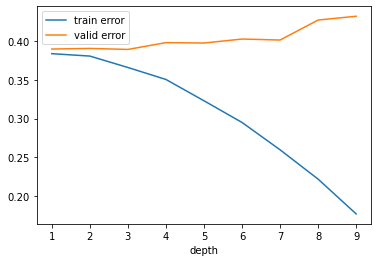

In [11]:
grid = {'max_depth':np.arange(1,10)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True,n_jobs=-1)

treeCV.fit(X,y)
print()
print('best tree depth =',treeCV.best_params_, '  Best Accuracy =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
print(1-results['train error'])
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)
print()
print('Feature Importance')
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)
features_importance = pd.Series(tree.feature_importances_,index=X.columns)
features_importance = features_importance[features_importance>0]
print(features_importance.sort_values(ascending=False))


R_avg_opp_HEAD_landed      0.327388
B_avg_SIG_STR_att          0.300396
B_age                      0.147234
R_age                      0.125733
B_Height_cms               0.050076
B_avg_opp_GROUND_landed    0.049173
dtype: float64


<AxesSubplot:>

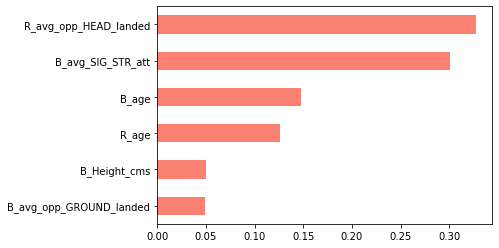

In [12]:
# feature importance
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)
features_importance = pd.Series(tree.feature_importances_,index=X.columns)
features_importance = features_importance[features_importance>0]
print(features_importance.sort_values(ascending=False))
features_importance.sort_values().plot.barh(color='salmon')

In [13]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)


importances = tree.feature_importances_
tree_importances = pd.Series(importances, index=X.columns)
sorted = tree_importances.sort_values(ascending = True)
importantFeatures = sorted[sorted!=0]
print(importantFeatures.index.values)

['B_avg_opp_GROUND_landed' 'B_Height_cms' 'R_age' 'B_age'
 'B_avg_SIG_STR_att' 'R_avg_opp_HEAD_landed']


### Now decision Tree with only the important features polynomial?

In [14]:


X_important = X[importantFeatures.index.values]
X_important.head()

,B_avg_opp_GROUND_landed,B_Height_cms,R_age,B_age,B_avg_SIG_STR_att,R_avg_opp_HEAD_landed
1,0.254956,-0.130310,-1.258810,-0.702540,-1.062626,0.446185
2,0.007713,-0.719735,0.425417,0.292501,-0.424651,0.114389
4,-0.404359,-0.425023,-0.536998,-1.448821,-1.160776,0.030294
5,1.012138,-1.014448,-0.777602,0.292501,0.864793,0.739755
7,-0.683795,-0.719735,1.869041,0.541262,0.032973,-0.394007


             X shape = (3890, 6)
X (engineered) shape = (3890, 209)

best tree depth = {'max_depth': 3}   Best Accuracy = 0.62

R_avg_opp_HEAD_landed^3                            0.312960
R_age R_avg_opp_HEAD_landed^2                      0.215596
B_avg_SIG_STR_att R_avg_opp_HEAD_landed^2          0.166663
B_age R_avg_opp_HEAD_landed^2                      0.161691
B_Height_cms^2 R_age                               0.093875
B_age B_avg_SIG_STR_att^2 R_avg_opp_HEAD_landed    0.049214
dtype: float64


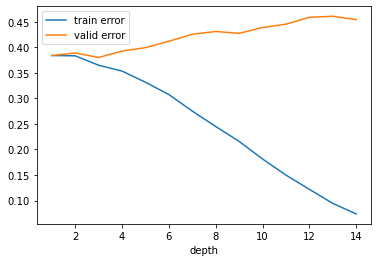

In [15]:
grid = {'max_depth':np.arange(1,15)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True)

poly = PolynomialFeatures(4,interaction_only=False,include_bias=False)
Xe = poly.fit_transform(X_important)
cols = poly.get_feature_names(X_important.columns)
Xe = pd.DataFrame(Xe,columns=cols)
print('             X shape =',X_important.shape)
print('X (engineered) shape =',Xe.shape)



treeCV.fit(Xe,y)


print()
print('best tree depth =',treeCV.best_params_, '  Best Accuracy =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)
print()


tree = DecisionTreeClassifier(max_depth = treeCV.best_params_.get('max_depth'))
tree.fit(Xe,y)
features_importance = pd.Series(tree.feature_importances_,index=Xe.columns)
features_importance = features_importance[features_importance>0]
print(features_importance.sort_values(ascending=False))


<AxesSubplot:>

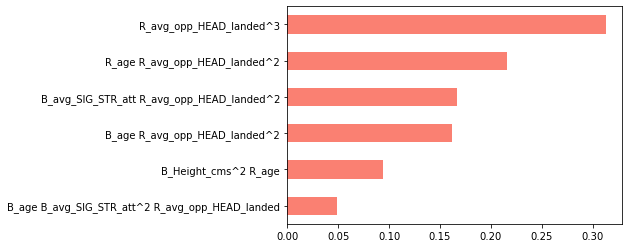

In [16]:
features_importance.sort_values().plot.barh(color='salmon')

In [21]:
from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(tree,
out_file=None,
feature_names=Xe.columns,
proportion=True,
impurity=True,
filled=True,
rounded=True)
graph = graphviz.Source(dot_data)
graph
graph.render('UFCPolyDecisionTree.png')

'UFCPolyDecisionTree.png.pdf'

## it improved 2%
lets give up on important features for now and check feature engineering on all variables with the important variables

In [134]:
poly = PolynomialFeatures(2,interaction_only=False,include_bias=False)
Xf = poly.fit_transform(X)
cols = poly.get_feature_names(X.columns)
Xf = pd.DataFrame(Xf,columns=cols)
res = []
for c in Xf.columns:
    for check in X_important.columns:
        if(check in c):
            res.append(c)


            


In [135]:
print(len(res), ' compare to the original number of features after feature engineering', Xf.shape[1])
Xnew = Xf.filter(res,axis=1)



178  compare to the original number of features after feature engineering 4004



best tree depth = {'max_depth': 3}   Best R2 = 0.555


<AxesSubplot:xlabel='depth'>

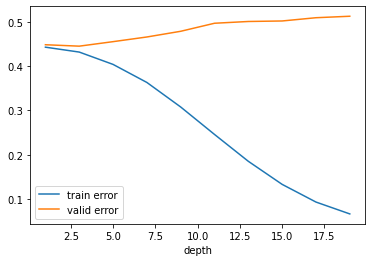

In [136]:
grid = {'max_depth':np.arange(1,20,2)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True, n_jobs = -1)


treeCV.fit(Xnew,y)
print()
print('best tree depth =',treeCV.best_params_, '  Best R2 =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)

Index(['DIFF_avg_TD_landed Fighters_Stance_Orthodox', 'DIFF_wins Diff_age',
       'DIFF_avg_TD_landed DIFF_losses', 'DIFF_avg_TD_landed', 'Diff_age'],
      dtype='object')


<AxesSubplot:>

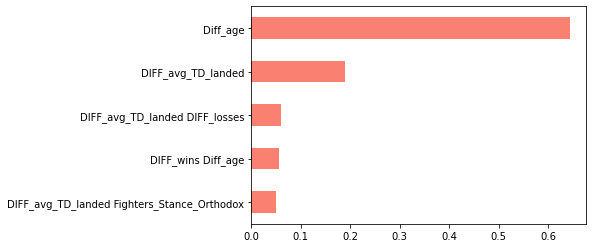

In [143]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(Xnew,y)


importances = tree.feature_importances_
tree_importances = pd.Series(importances, index=Xnew.columns)
sorted = tree_importances.sort_values(ascending = True)
impF = sorted[sorted!=0]

print(impF.index)
impF.sort_values().plot.barh(color='salmon')

In [ ]:
# Diff_age^3                         0.494991
# DIFF_avg_TD_landed^5               0.197668
# Diff_age^4                         0.178417
# DIFF_avg_TD_landed Diff_age^4      0.065945
# DIFF_avg_TD_landed^3               0.042489
# DIFF_avg_TD_landed^2 Diff_age^3    0.020490
# Diff_age                                       0.473298
# DIFF_avg_TD_landed                             0.189005
# Diff_age^2                                     0.170597
# DIFF_avg_TD_landed DIFF_losses                 0.060547
# DIFF_wins Diff_age                             0.055826
# DIFF_avg_TD_landed Fighters_Stance_Orthodox    0.050727 

In [153]:
X_collection = Xnew[['DIFF_avg_TD_landed Fighters_Stance_Orthodox', 'DIFF_wins Diff_age',
       'DIFF_avg_TD_landed DIFF_losses', 'DIFF_avg_TD_landed', 'Diff_age']].copy()

X_collection['Diff_age^3'] = X_collection['Diff_age']**3
X_collection['DIFF_avg_TD_landed^5'] = X_collection['DIFF_avg_TD_landed']**5               
X_collection['Diff_age^4'] = X_collection['Diff_age']**4                         
X_collection['DIFF_avg_TD_landed Diff_age^4'] = X_collection['DIFF_avg_TD_landed'] * X_collection['Diff_age^4']
X_collection['DIFF_avg_TD_landed^3'] = X_collection['DIFF_avg_TD_landed']**3               
X_collection['DIFF_avg_TD_landed^2 Diff_age^3'] = X_collection['DIFF_avg_TD_landed']**2 * X_collection['Diff_age^3'] 
X_collection.head(3)

,DIFF_avg_TD_landed Fighters_Stance_Orthodox,DIFF_wins Diff_age,DIFF_avg_TD_landed DIFF_losses,DIFF_avg_TD_landed,Diff_age,Diff_age^3,DIFF_avg_TD_landed^5,Diff_age^4,DIFF_avg_TD_landed Diff_age^4,DIFF_avg_TD_landed^3,DIFF_avg_TD_landed^2 Diff_age^3
0,0.0,-0.0,0.000,0.00000,-2.0,-8.0,0.000000,16.0,0.00000,0.000000,-0.000000
1,-0.0,2.0,-4.375,-1.09375,1.0,1.0,-1.565274,1.0,-1.09375,-1.308441,1.196289
2,-0.0,-4.0,-3.000,-1.00000,4.0,64.0,-1.000000,256.0,-256.00000,-1.000000,64.000000



best tree depth = {'max_depth': 3}   Best R2 = 0.563


<AxesSubplot:xlabel='depth'>

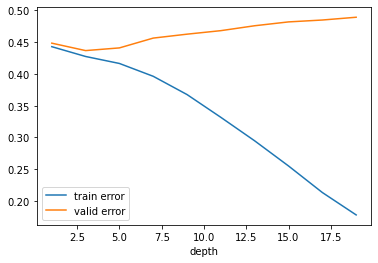

In [154]:
grid = {'max_depth':np.arange(1,20,2)}
rtree = DecisionTreeClassifier()
treeCV = GridSearchCV(rtree,param_grid=grid,return_train_score=True, n_jobs = -1)


treeCV.fit(X_collection,y)
print()
print('best tree depth =',treeCV.best_params_, '  Best R2 =', (treeCV.best_score_).round(3))

results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train error'] =1 - treeCV.cv_results_['mean_train_score']
results['valid error']  = 1 - treeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='depth',y='train error')
results.plot.line(x='depth',y='valid error',ax=ax1)